<a href="https://colab.research.google.com/github/Vetair/MVexercises/blob/main/Week_5_practical_ANN_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Exercises

/content/drive/MyDrive/Colab Notebooks/Exercises


# 1.import libraries:

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential  #stick layer
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Define paths for your dataset
train_dir = r'/content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/train'
test_dir = r'/content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/test'

# 2.preprocess data:

In [ ]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


# 3. build model

In [ ]:
# Build a neural network model
model = Sequential([
    Flatten(input_shape = (128, 128, 3)), #define input layer & Flatten to reshape vector
    Dense(units = 500, activation = 'relu'), #1st hidden layer & units can be removed
    Dense(units = 300, activation = 'relu'), #2nd hidden layer
    Dense(units = 3, activation = 'softmax'), #output layer (Binary classification - units = 1 & Sigmoid,
                                        # more than 1 = classes & Softmax)
])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 500)               24576500  
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 3)                 903       
                                                                 
Total params: 24727703 (94.33 MB)
Trainable params: 24727703 (94.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model - Adam
model.compile(optimizer=Adam(learning_rate=0.001),
       loss='categorical_crossentropy',
       metrics=['Accuracy'])

In [ ]:
# Fit the model for training
history = model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
5/5 [==============================] - 24s 5s/step - loss: 38.5193 - Accuracy: 0.3590 - val_loss: 39.8485 - val_Accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 2s 431ms/step - loss: 32.3643 - Accuracy: 0.2308 - val_loss: 15.7244 - val_Accuracy: 0.4444
Epoch 3/20
5/5 [==============================] - 2s 430ms/step - loss: 26.7436 - Accuracy: 0.3077 - val_loss: 14.9017 - val_Accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 2s 448ms/step - loss: 22.4158 - Accuracy: 0.3333 - val_loss: 12.2436 - val_Accuracy: 0.2222
Epoch 5/20
5/5 [==============================] - 3s 604ms/step - loss: 7.0517 - Accuracy: 0.4359 - val_loss: 8.5870 - val_Accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 4s 832ms/step - loss: 8.5325 - Accuracy: 0.3077 - val_loss: 6.0470 - val_Accuracy: 0.3333
Epoch 7/20
5/5 [==============================] - 4s 675ms/step - loss: 11.1413 - Accuracy: 0.3846 - val_loss: 1.6564 - val_Accuracy: 0.3333
Epoch 8/20
5/

In [ ]:
# Save the trained model
model.save('faces_cat_dog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


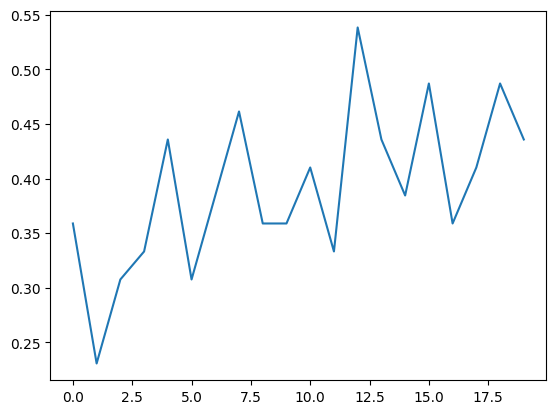

In [ ]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['Accuracy'])

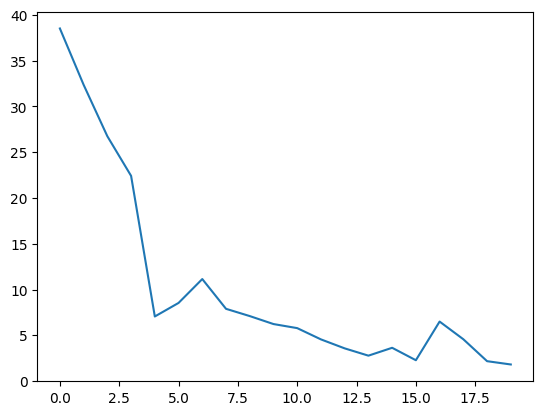

In [ ]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])

In [ ]:
# Load the trained model
model = load_model('faces_cat_dog.h5')  # Replace with the path to your trained model file


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/test

/content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/test


In [ ]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data



3/3 [==============================] - 8s 4s/step


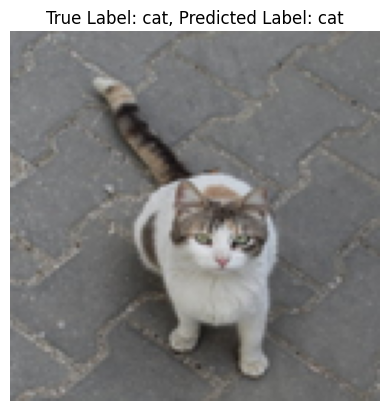

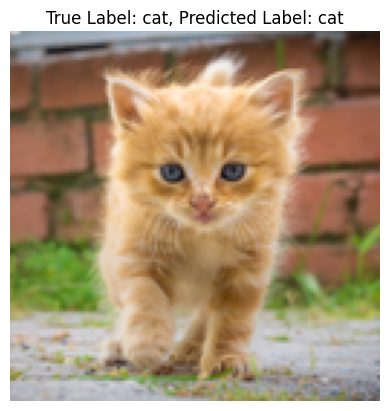

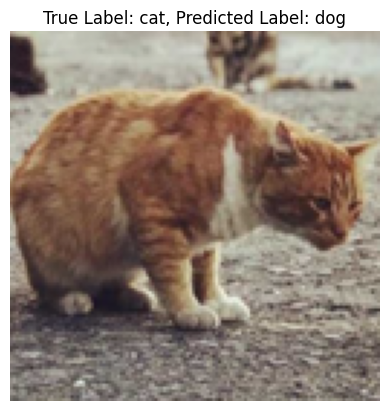

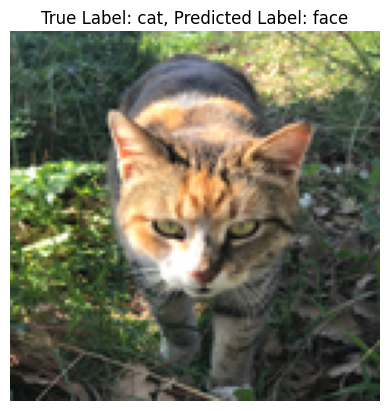

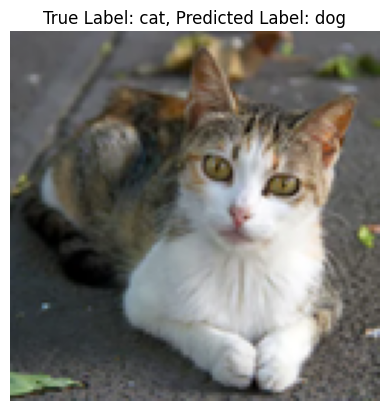

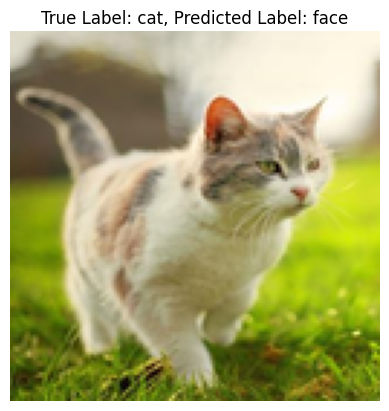

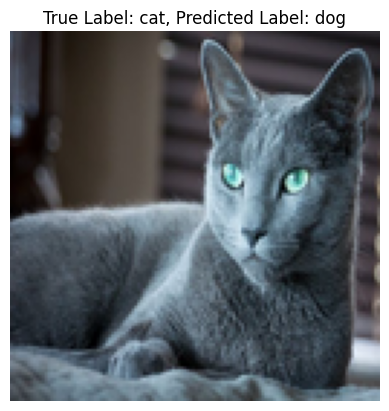

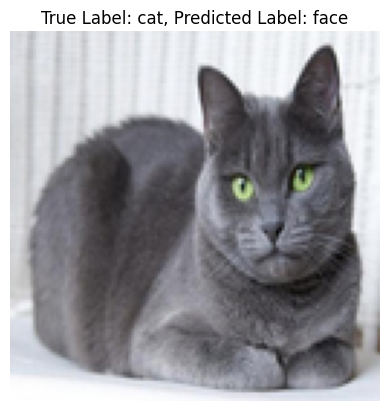

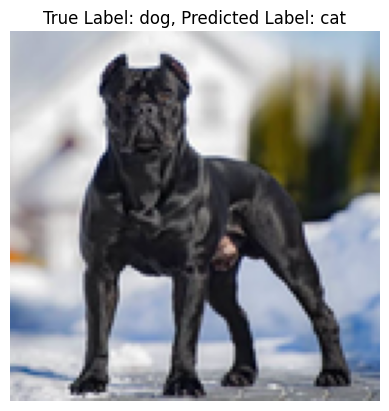

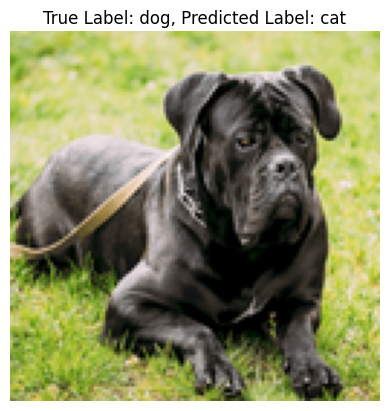

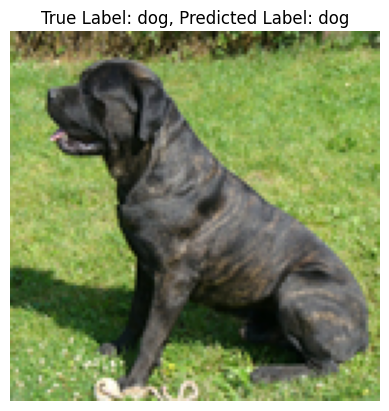

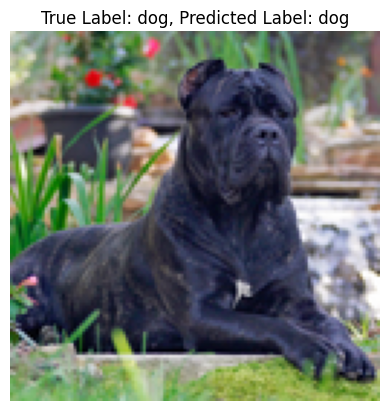

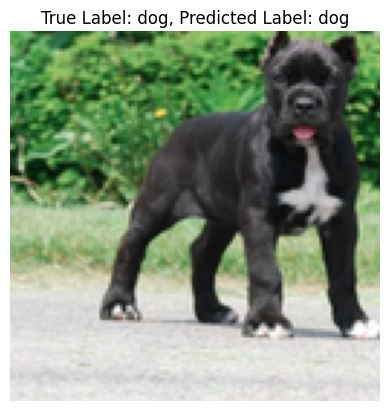

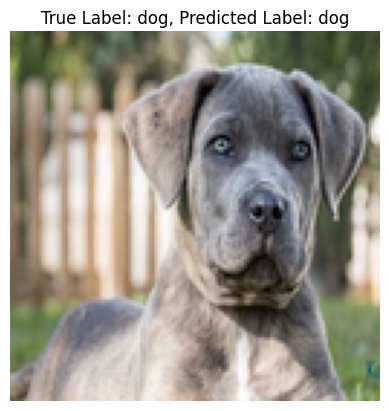

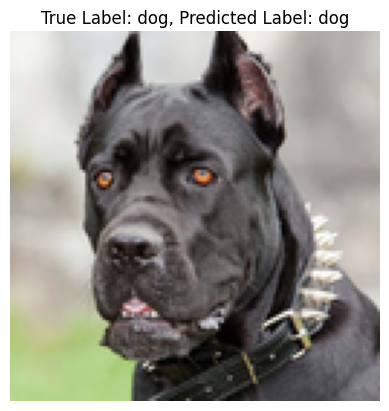

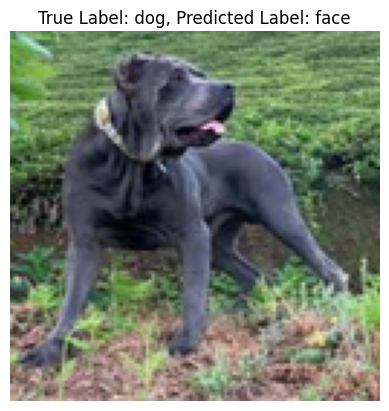

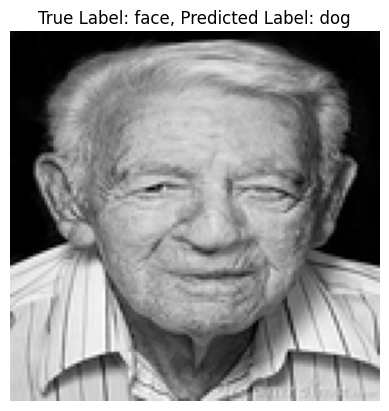

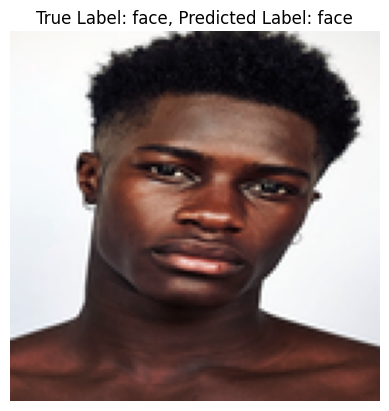

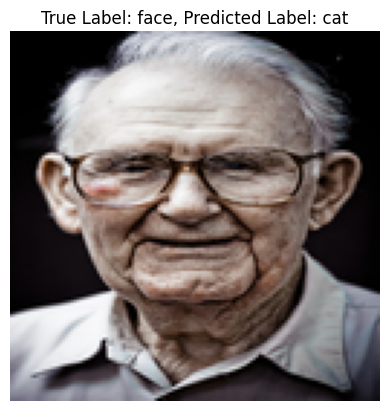

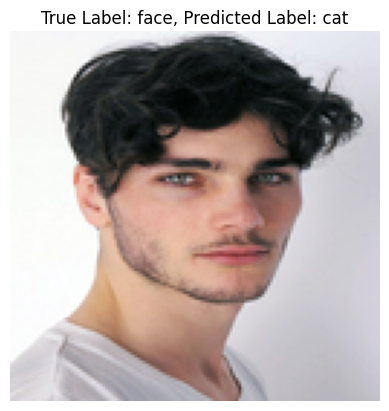

In [ ]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
